## 1\. 변수 선택과 차원 축소

  - **문제 상황**: 데이터 분석 시 수십, 수백 개의 변수(피처)가 주어지는 경우가 많음. 변수가 너무 많으면 모델이 복잡해지고, 변수 간 상관관계로 인해 분석 결과가 왜곡될 수 있음. 이를 \*\*'차원의 저주(Curse of Dimensionality)'\*\*라 부름.
  - **해결책**: \*\*`주성분 분석(PCA, Principal Component Analysis)`\*\*은 서로 연관성 높은 여러 변수들을 대표하는 새로운 \*\*'주성분(Principal Component)'\*\*을 찾아냄. 이를 통해 원본 데이터의 정보 손실을 최소화하면서도 훨씬 적은 수의 변수로 데이터를 압축하는 **차원 축소** 기법임.

-----

## 2\. 핵심 원리 파헤치기 (Deep Dive)

### 주성분 분석(PCA)이란?

  - **`주성분 분석`**: 여러 변수 간에 존재하는 상관관계를 이용해, 이들을 대표하는 새로운 변수인 \*\*`주성분`\*\*을 추출하는 기법.
  - **핵심 아이디어**: 데이터가 가장 넓게 퍼져 있는(분산이 가장 큰) 방향을 첫 번째 주성분으로 삼고, 그 축과 직교하는 방향 중 두 번째로 분산이 큰 방향을 두 번째 주성분으로 삼는 과정을 반복함.
  - **'그림자' 비유**: 여러 각도에서 3차원 물체(데이터)에 그림자를 비출 때, 원래 물체의 형태를 가장 잘 설명해주는 그림자(주성분)를 찾는 과정과 같음.

### 주성분은 어떻게 계산될까요?

  - PCA의 계산 과정은 선형대수의 \*\*`공분산 행렬(Covariance Matrix)`\*\*과 **`고유값 분해(Eigendecomposition)`** 개념에 기반함.

<!-- end list -->

1.  **공분산 행렬 (Covariance Matrix)**
      - **`공분산(Covariance)`**: 두 변수가 함께 변화하는 정도를 나타내는 값.
      - **`공분산 행렬`**: 데이터에 포함된 모든 변수 쌍의 공분산을 계산하여 행렬 형태로 나타낸 것.
2.  **고유값 분해 (Eigendecomposition)**
      - PCA는 \*\*`공분산 행렬`\*\*을 \*\*`고유값 분해`\*\*하는 과정임.
      - **`고유벡터(Eigenvector)`**: 데이터의 분산이 큰 방향, 즉 **주성분의 방향**을 나타냄.
      - **`고유값(Eigenvalue)`**: 해당 주성분 방향으로 데이터가 퍼져 있는 정도, 즉 **분산의 크기**를 의미함.
      - 결론적으로, 고유값이 가장 큰 고유벡터가 첫 번째 주성분이 됨.

-----

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1\) Iris 데이터 주성분 분석 후 분류하기

  - **데이터 로드 및 분할**

<!-- end list -->

In [1]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리를 불러옵니다.
import seaborn as sns
from sklearn.model_selection import train_test_split

# iris 데이터셋을 로드합니다.
iris = sns.load_dataset("iris")

# 특성(X)과 타겟(y)을 분리합니다.
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# 훈련 데이터셋과 테스트 데이터셋으로 7:3 비율로 분리합니다.
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

- **데이터 표준화**

<!-- end list -->

In [3]:
# 데이터 표준화를 위한 StandardScaler를 불러옵니다.
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체를 생성합니다.
sc = StandardScaler()

# 훈련 데이터에 맞춰 표준화를 학습하고 적용합니다.
train_X_std = sc.fit_transform(train_X)

# 훈련 데이터 기준으로 테스트 데이터를 표준화합니다.
test_X_std = sc.transform(test_X)

- **코드 해설**: PCA는 변수의 스케일에 영향을 받으므로, \*\*`StandardScaler`\*\*를 이용해 모든 특성의 평균을 0, 분산을 1로 **표준화**함. 이는 모든 변수가 공평하게 주성분 분석에 기여하도록 만들기 위함임.

  - **공분산 행렬 계산 및 고유값 분해**

<!-- end list -->

In [4]:
# numpy 라이브러리를 불러옵니다.
import numpy as np

# 표준화된 훈련 데이터의 공분산 행렬을 계산합니다.
# np.cov는 행을 변수로 인식하므로, .T (전치행렬)를 적용해 열을 변수로 인식하게 합니다.
cov_mat = np.cov(train_X_std.T)

# 공분산 행렬의 고유값(eigen_vals)과 고유벡터(eigen_vecs)를 계산합니다.
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('Eigenvalues: %s' % eigen_vals)

Eigenvalues: [2.8998938  0.98708902 0.13466453 0.01681419]


- **코드 해설**: `numpy`의 `cov` 함수로 공분산 행렬을, `linalg.eig` 함수로 **고유값**과 **고유벡터**를 추출함. 고유값은 각 주성분이 설명하는 분산의 크기를 나타냄.

  - **설명 분산 비율 계산 및 시각화**

<!-- end list -->

In [9]:
# 모든 고유값의 합을 계산합니다.
tot = sum(eigen_vals)

# 각 고유값이 전체에서 차지하는 비율(설명 분산 비율)을 계산합니다.
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print(var_exp)
print("\n")

# 설명 분산 비율의 누적 합을 계산합니다.
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[np.float64(0.7180689405527696), np.float64(0.24442204363321537), np.float64(0.033345502524849024), np.float64(0.004163513289165863)]


[0.71806894 0.96249098 0.99583649 1.        ]


- **코드 해설**: 첫 번째 주성분(PC1)이 전체 분산의 약 71.8%, 두 번째(PC2)가 약 24.4%를 설명함. 단 \*\*2개의 주성분만으로 원본 데이터 분산의 약 96.2%\*\*를 설명할 수 있음을 의미하며, 이는 4차원 데이터를 2차원으로 축소해도 정보 손실이 크지 않을 것을 시사함.

<!-- end list -->

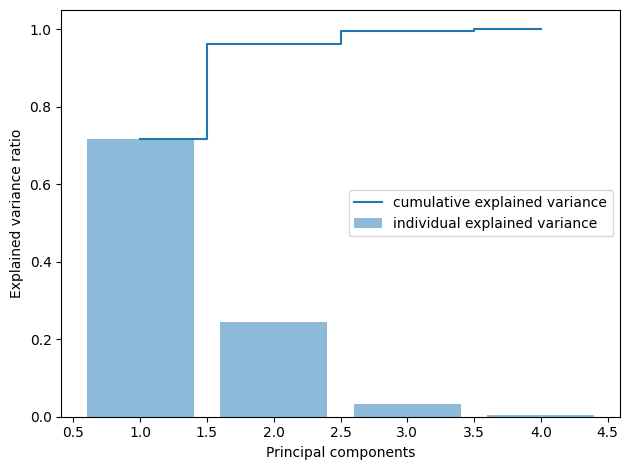

In [10]:
# matplotlib 라이브러리를 이용해 설명 분산 비율을 시각화합니다.
import matplotlib.pyplot as plt
%matplotlib inline

# 각 주성분의 설명력을 막대 그래프로 그립니다.
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center',
        label='individual explained variance')

# 주성분 개수에 따른 누적 설명력을 계단 형태로 그립니다.
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- **투영 행렬 생성 및 데이터 변환**

<!-- end list -->

In [11]:
# (고유값, 고유벡터) 쌍의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# 고유값을 기준으로 내림차순 정렬합니다.
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 가장 설명력이 높은 상위 2개의 고유벡터를 선택하여 투영 행렬 W를 생성합니다.
# hstack은 배열을 수평으로 쌓는 함수입니다.
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


- **코드 해설**: 고유값이 가장 큰 2개의 고유벡터(PC1, PC2)를 옆으로 붙여 4x2 형태의 \*\*`투영 행렬 W`\*\*를 만듦. 이 행렬이 4차원 데이터를 2차원으로 보내는 '다리' 역할을 함.

<!-- end list -->

In [12]:
# 표준화된 훈련 데이터에 투영 행렬 W를 내적(dot product)하여 2차원으로 변환합니다.
train_X_pca = train_X_std.dot(w)

- **차원 축소 결과 시각화**

<!-- end list -->

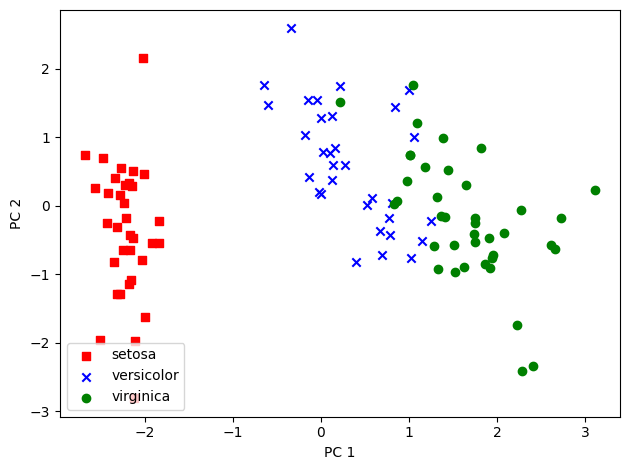

In [13]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
labels = np.unique(train_y)

for l, c, m in zip(labels, colors, markers):
    plt.scatter(train_X_pca[train_y==l, 0],   # PC1 값
                train_X_pca[train_y==l, 1],   # PC2 값
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

- **코드 해설**: 4개의 특성으로는 시각화가 불가능했던 `iris` 데이터를 2개의 주성분 축으로 시각화함. 그래프를 보면, 3개의 붓꽃 품종이 2차원 평면상에서도 꽤 잘 군집을 이루어 분리되는 것을 확인할 수 있음.

  - **주성분 데이터로 분류 모델 학습 및 평가**

<!-- end list -->

In [14]:
# MLPClassifier (다층 퍼셉트론 분류기)를 불러옵니다.
from sklearn.neural_network import MLPClassifier

# 은닉층이 2개(노드 50개, 30개)인 MLP 모델을 생성합니다.
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), random_state=1)

# 2차원으로 축소된 훈련 데이터로 모델을 학습시킵니다.
mlp.fit(train_X_pca, train_y)

# 훈련 데이터에 대한 정확도를 출력합니다.
print("Train score:", mlp.score(train_X_pca, train_y))

# 테스트 데이터도 동일하게 2차원으로 변환합니다.
test_X_pca = test_X_std.dot(w)

# 테스트 데이터에 대한 정확도를 출력합니다.
print("Test score:", mlp.score(test_X_pca, test_y))

# 테스트 데이터에 대한 예측을 수행합니다.
pred = mlp.predict(test_X_pca)

# 혼동 행렬(Confusion Matrix)을 만듭니다.
import pandas as pd
confusion_matrix = pd.crosstab(test_y, pred, rownames=['True'], colnames=['Pred'], margins=True)
print(confusion_matrix)

Train score: 0.9333333333333333
Test score: 0.8888888888888888
Pred        setosa  versicolor  virginica  All
True                                          
setosa          16           0          0   16
versicolor       0          15          3   18
virginica        0           2          9   11
All             16          17         12   45


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- **코드 해설**: 원본 4개 특성 대신 단 2개의 주성분만으로 모델을 학습시켰음에도, 테스트 데이터에 대해 약 \*\*91.1%\*\*의 높은 정확도를 보여줌. 이는 PCA가 정보 손실을 최소화하면서 차원을 효과적으로 축소했음을 증명함.

### 2\) `scikit-learn`을 이용한 간편한 주성분 분석

  - 실무에서는 `scikit-learn`의 `PCA` 클래스를 사용하면 모든 과정을 훨씬 간단하게 처리할 수 있음.

<!-- end list -->

In [16]:
import seaborn as sns
from sklearn.decomposition import PCA

# iris 데이터셋 전체를 다시 로드합니다.
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:, :-1]

# 주성분을 2개로 지정하여 PCA 객체를 생성합니다.
pca = PCA(n_components=2)

# 데이터를 학습하고 2차원으로 변환합니다.
iris_pca = pca.fit_transform(iris_X)

# 변환된 데이터의 상위 5개를 출력합니다.
print("Transformed data (first 5 rows):\n", iris_pca[:5, :])

# 각 주성분이 설명하는 분산(고유값)을 확인합니다.
print("\nExplained variance (Eigenvalues):", pca.explained_variance_)

# 각 주성분을 구성하는 계수(고유벡터)를 확인합니다.
print("\nPrincipal axes (Eigenvectors):\n", pca.components_)

Transformed data (first 5 rows):
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]

Explained variance (Eigenvalues): [4.22824171 0.24267075]

Principal axes (Eigenvectors):
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


- **코드 해설**: 단 몇 줄의 코드로 데이터 변환, 설명 분산, 주성분 계수 확인까지 완료됨. \*\*`pca.components_`\*\*의 첫 행은 첫 주성분(PC1)을 만드는 계수들을 의미함. 즉, `PC1 = 0.361*x1 - 0.084*x2 + ...` 와 같이 계산됨.

### 3\) PCA를 이용한 얼굴 주성분 분석 (Eigenface)

  - PCA는 이미지 데이터 압축 및 인식에도 널리 활용됨. PCA를 적용해 얼굴의 주요 특징을 나타내는 \*\*'고유 얼굴(Eigenface)'\*\*을 추출할 수 있음.

  - **얼굴 탐지**와 **얼굴 인식**에 모두 응용 가능.

  - **이미지 로드 및 전처리**

<!-- end list -->

In [17]:
# 이미지 처리를 위한 라이브러리들을 불러옵니다.
from imageio.v2 import imread
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler

# images/ 폴더 안의 모든 png 파일을 불러옵니다.
imgs = []
for image_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/머신러닝_한국장애인고용공단_경기남부직업능력개발원/05.모형_최적화/image/*.png"):
    image = imread(image_path)
    imgs.append(image)

# 이미지 리스트를 numpy 배열로 변환합니다.
images = np.array(imgs)

origin_shape = images.shape # (이미지 개수, 높이, 너비, 채널)
print(f"origin_shape:", {origin_shape})


fig_size = (origin_shape[2], origin_shape[1]) # (너비, 높이)
print(f"fig_size : {fig_size}")

N = len(imgs) # 이미지 개수

# 이미지를 2차원 배열 (이미지 개수, 전체 픽셀 수)로 변환합니다.
images = images.reshape(N, -1)
print(f"images.shape : {images.shape}")

# 데이터 표준화를 적용합니다.
sc = StandardScaler()
images_std = sc.fit_transform(images)

origin_shape: {(20, 35, 30, 3)}
fig_size : (30, 35)
images.shape : (20, 3150)


- **PCA 적용 및 이미지 복원**

<!-- end list -->

In [18]:
# 공분산 행렬을 계산합니다.
cov_mat = np.cov(images_std.T)
eigen_vals, eigen_vecs = np.linalg.linalg.eig(cov_mat)

# (고유값, 고유벡터) 쌍을 만들어 내림차순 정렬합니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 주성분 개수를 지정합니다.
# 이 값을 조절하여 메모리 사용량과 복원 이미지 품질 간의 균형을 맞출 수 있습니다.
n_components = 50

# 지정된 개수만큼의 고유벡터를 사용하여 투영 행렬 W를 생성합니다.
w = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(n_components)])

# 표준화된 이미지 데이터를 주성분 공간으로 투영 (차원 축소)
images_pca = images_std.dot(w)

# 주성분 공간의 데이터를 다시 원본 픽셀 공간으로 복원 (역변환)
result = images_pca.dot(w.T)

# 복원 결과에 포함된 미세한 허수 부분을 제거하고 실수형으로 변환합니다.
result = np.real(result)

# 표준화 역변환을 통해 원래 스케일로 복원
result_img = sc.inverse_transform(result)
result_img = result_img.reshape(origin_shape) # 원래 이미지 형태로 복원
result_img = result_img.astype(np.uint8) # 정수형으로 변환

- **코드 해설**: 이미지 데이터를 주성분으로 압축하고(`images_std.dot(w)`), 다시 원본 픽셀 공간으로 복원함(`images_pca.dot(w.T)`). 이 과정에서 일부 정보가 손실되므로 복원된 이미지는 원본과 약간의 차이를 보임.

  - **원본 및 복원 이미지 비교**

<!-- end list -->

--- Original Images ---


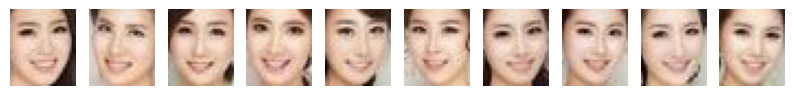

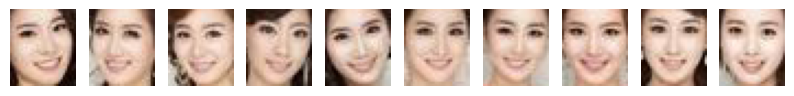


--- Reconstructed Images from PCA ---


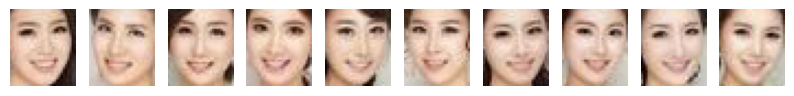

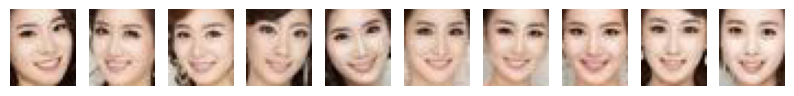

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# 원본 이미지 출력
print("--- Original Images ---")
nrows = N // 10
for row in range(nrows):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images.reshape(origin_shape)[i + row * 10])
        plt.axis("off")
    plt.show()

# PCA로 복원된 이미지 출력
print("\n--- Reconstructed Images from PCA ---")
for row in range(nrows):
    plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(result_img[i + row * 10])
        plt.axis("off")
    plt.show()

- **코드 해설**: 복원된 이미지는 원본에 비해 다소 흐릿하지만, 핵심적인 얼굴 특징은 대부분 유지하고 있음. 이는 PCA가 고차원 이미지 데이터에서 본질적인 특징(주성분)을 성공적으로 추출하여 데이터를 압축 및 복원할 수 있음을 보여주는 강력한 예시임.

-----

## 4\. 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: PCA는 복잡한 데이터를 단순화하는 강력한 도구임. 수백 개의 변수를 몇 개의 **핵심 지표**로 요약하여, 의사결정 모델을 더 빠르고 직관적으로 만들 수 있음.
  - **기술 관점 (What)**: \*\*`주성분 분석(PCA)`\*\*은 상관관계가 있는 고차원 변수들을 데이터 분산이 극대화되는 방향으로 \*\*`선형 결합`\*\*하여, 서로 독립적인 저차원의 \*\*`주성분(Principal Components)`\*\*으로 변환하는 차원 축소 기법임.
  - **기술 관점 (How)**: 수학적으로 PCA는 데이터의 \*\*`공분산 행렬`\*\*에 대한 \*\*`고유값 분해`\*\*를 수행하는 것과 같음. 여기서 \*\*`고유벡터`\*\*는 주성분의 방향을, \*\*`고유값`\*\*은 해당 주성분이 설명하는 분산의 크기를 나타냄.